### UAS Data Mining
    Nama   : Riska Nurohmah
    NIM    : 2109103
    Kelas  : C2 Ilmu Komputer

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset atau file csv ke DataFrame
df1 = pd.read_csv("C:\\Users\\riska\\Downloads\\uas_datmin\\pmi.csv") #sesuaikan path

In [3]:
df1.head(5)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI


In [4]:
#Memilih dataset ini karena PMI memiliki dimensi pengetahuan
df2 = pd.read_csv("C:\\Users\\riska\\Downloads\\uas_datmin\\melek_huruf_diatas15.csv")
df2.head(5)

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18
4,JAMBI,2022,98.1


In [5]:
#Memilih dataset ini karena PMI memiliki dimensi umur panjang
df3 = pd.read_csv("C:\\Users\\riska\\Downloads\\uas_datmin\\proporsi_hidup_dibawah_50_persen_median_pendapatan.csv")
df3.head(5)

,tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov
0,2021,9.98,ACEH
1,2021,5.87,SUMATERA UTARA
2,2021,2.47,SUMATERA BARAT
3,2021,2.52,RIAU
4,2021,5.91,JAMBI


In [6]:
df_merge = pd.merge(df2, df3, how='left',on=["tahun", "prov"])

In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   prov                                                315 non-null    object 
 1   tahun                                               315 non-null    int64  
 2   melek_huruf_diatas15                                315 non-null    object 
 3   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ KB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [9]:
df_merge2 = pd.merge(df1, df_merge, how='left',on=["tahun", "prov"])

In [10]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   prov                                                442 non-null    object 
 1   tahun                                               442 non-null    int64  
 2   kategori_pmi                                        442 non-null    object 
 3   melek_huruf_diatas15                                306 non-null    object 
 4   proporsi_hidup_dibawah_50_persen_median_pendapatan  136 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.7+ KB


In [11]:
df_merge2 = df_merge2.replace('-', 0)
#df_merge2["kategori_pmi"] = df_merge2["kategori_pmi"].astype("category")
df_merge2["melek_huruf_diatas15"] = df_merge2["melek_huruf_diatas15"].astype("float64")

In [12]:
df_merge2['melek_huruf_diatas15'].fillna(0, inplace=True)

In [13]:
df_merge2['proporsi_hidup_dibawah_50_persen_median_pendapatan'].fillna(0, inplace=True)

In [14]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   prov                                                442 non-null    object 
 1   tahun                                               442 non-null    int64  
 2   kategori_pmi                                        442 non-null    object 
 3   melek_huruf_diatas15                                442 non-null    float64
 4   proporsi_hidup_dibawah_50_persen_median_pendapatan  442 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.7+ KB


<AxesSubplot:xlabel='kategori_pmi', ylabel='count'>

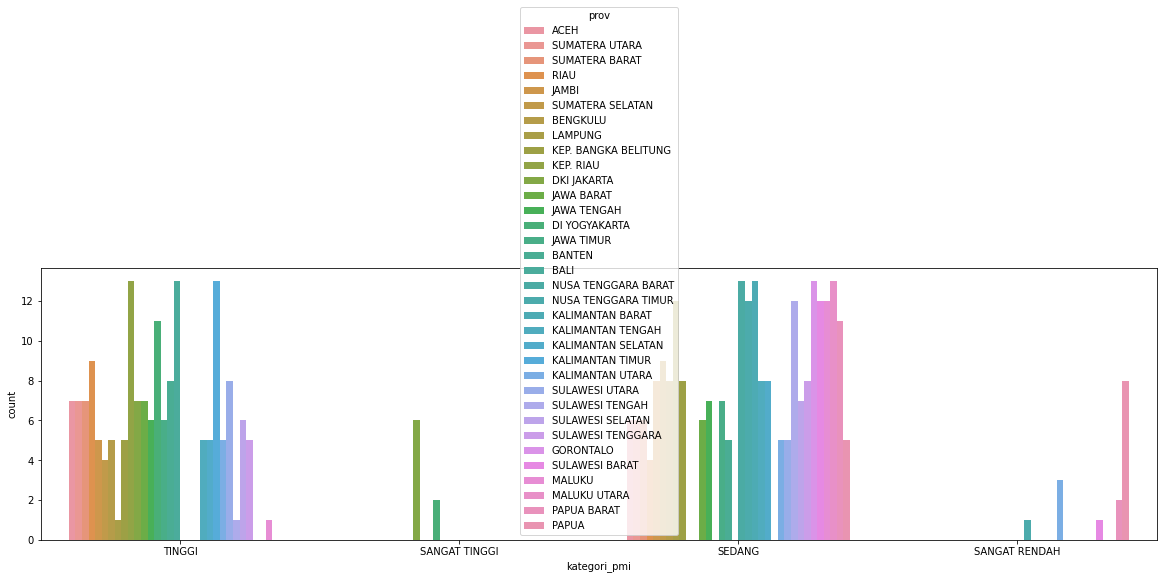

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(ax=ax, x="kategori_pmi", hue="prov", data=df_merge2)

In [16]:
df_merge2 = df_merge2.drop(['prov'],axis=1)

In [17]:
x = df_merge2.drop("kategori_pmi", axis=1)
y = df_merge2.kategori_pmi

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [19]:
import pickle
with open('C:\\Users\\riska\\Downloads\\uas_datmin\\orders_train_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf_RF3 = RandomForestClassifier(n_estimators=50, random_state=0)
clf_RF3.fit(X_train, Y_train)
Y_pred = clf_RF3.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6917293233082706
               precision    recall  f1-score   support

SANGAT RENDAH       1.00      0.17      0.29         6
SANGAT TINGGI       0.50      0.50      0.50         2
       SEDANG       0.71      0.76      0.73        71
       TINGGI       0.67      0.67      0.67        54

     accuracy                           0.69       133
    macro avg       0.72      0.52      0.55       133
 weighted avg       0.70      0.69      0.68       133



In [21]:
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(X_train, Y_train)
Y_pred = clf_DT.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.706766917293233
               precision    recall  f1-score   support

SANGAT RENDAH       1.00      0.17      0.29         6
SANGAT TINGGI       0.00      0.00      0.00         2
       SEDANG       0.73      0.83      0.78        71
       TINGGI       0.71      0.63      0.67        54

     accuracy                           0.71       133
    macro avg       0.61      0.41      0.43       133
 weighted avg       0.72      0.71      0.70       133

